# Big data project : Youtube US Trending analysis

Question : OVERVIEW & US Trend in 2021

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

- Data description

In [2]:
df=pd.read_csv('US_youtube_trending_data.csv')
df

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare..."
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94786,IrjbjSS1MHk,Putting an Engine in My Tesla and Taking It to...,2021-11-15T17:00:25Z,UCR0VLWitB2xM4q7tjkoJUPw,Vlog Creations,24,2021-11-22T00:00:00Z,rosscreations|ross|creations|funny|hilarious|s...,2312514,111085,1689,5122,https://i.ytimg.com/vi/IrjbjSS1MHk/default.jpg,False,False,Check out @Rich Rebuilds he finished his V8 te...
94787,JLn58b_zErg,Keke Palmer Explains Why She Went “Instagram O...,2021-11-15T23:17:48Z,UCcq6gCTW4ntQny2ACWXXLlw,Tamron Hall Show,24,2021-11-22T00:00:00Z,Tamron Hall|Tamron Hall Show|Tamron|daytime te...,334966,9431,166,716,https://i.ytimg.com/vi/JLn58b_zErg/default.jpg,False,False,It’s Keke Palmer’s first interview on the “Tam...
94788,X4isJPktybU,SPIDERMAN NO WAY HOME TRAILER REACTION! Captai...,2021-11-17T02:59:48Z,UC7yRILFFJ2QZCykymr8LPwA,New Rockstars,24,2021-11-22T00:00:00Z,new rockstars|new rockstars youtube|youtube ne...,1455253,77807,1137,4669,https://i.ytimg.com/vi/X4isJPktybU/default.jpg,False,False,NEW Spider-Man No Way Home TRAILER reveals Gre...
94789,e_XC7xxBtx0,Booted Back & Changed Up: Meet the Salvaged B....,2021-11-16T10:04:13Z,UClG8odDC8TS6Zpqk9CGVQiQ,Fortnite,20,2021-11-22T00:00:00Z,yt:cc=on,708336,34931,3190,5211,https://i.ytimg.com/vi/e_XC7xxBtx0/default.jpg,False,False,The Cube Queen has deployed her strongest warr...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94791 entries, 0 to 94790
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   video_id           94791 non-null  object
 1   title              94791 non-null  object
 2   publishedAt        94791 non-null  object
 3   channelId          94791 non-null  object
 4   channelTitle       94791 non-null  object
 5   categoryId         94791 non-null  int64 
 6   trending_date      94791 non-null  object
 7   tags               94791 non-null  object
 8   view_count         94791 non-null  int64 
 9   likes              94791 non-null  int64 
 10  dislikes           94791 non-null  int64 
 11  comment_count      94791 non-null  int64 
 12  thumbnail_link     94791 non-null  object
 13  comments_disabled  94791 non-null  bool  
 14  ratings_disabled   94791 non-null  bool  
 15  description        93313 non-null  object
dtypes: bool(2), int64(5), object(9)
memory u

- Data Cleansing

1. Delete unneccessary column

In [4]:
df.drop(columns=['thumbnail_link','description'], inplace=True, errors='ignore')
df

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,False,False
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,False,False
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,False,False
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,False,False
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94786,IrjbjSS1MHk,Putting an Engine in My Tesla and Taking It to...,2021-11-15T17:00:25Z,UCR0VLWitB2xM4q7tjkoJUPw,Vlog Creations,24,2021-11-22T00:00:00Z,rosscreations|ross|creations|funny|hilarious|s...,2312514,111085,1689,5122,False,False
94787,JLn58b_zErg,Keke Palmer Explains Why She Went “Instagram O...,2021-11-15T23:17:48Z,UCcq6gCTW4ntQny2ACWXXLlw,Tamron Hall Show,24,2021-11-22T00:00:00Z,Tamron Hall|Tamron Hall Show|Tamron|daytime te...,334966,9431,166,716,False,False
94788,X4isJPktybU,SPIDERMAN NO WAY HOME TRAILER REACTION! Captai...,2021-11-17T02:59:48Z,UC7yRILFFJ2QZCykymr8LPwA,New Rockstars,24,2021-11-22T00:00:00Z,new rockstars|new rockstars youtube|youtube ne...,1455253,77807,1137,4669,False,False
94789,e_XC7xxBtx0,Booted Back & Changed Up: Meet the Salvaged B....,2021-11-16T10:04:13Z,UClG8odDC8TS6Zpqk9CGVQiQ,Fortnite,20,2021-11-22T00:00:00Z,yt:cc=on,708336,34931,3190,5211,False,False


2. Import category name instead of categoryId

In [5]:
import json

with open('US_category_id.json','r') as json_file:
    data = json.load(json_file)

In [6]:
categoryID, l_c = data['items'], len(data['items'])
ID_to_Category = dict(zip([int(categoryID[i]['id']) for i in range(l_c)],
                          [categoryID[i]['snippet']['title'] for i in range(l_c)]))

In [7]:
ID_to_Category.keys()

dict_keys([1, 2, 10, 15, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44])

In [8]:
with open('id_to_category.json', 'w') as outfile:
    json.dump(ID_to_Category, outfile)

In [9]:
df['categoryId'] = df['categoryId'].apply(lambda x: ID_to_Category[x])
df

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,People & Blogs,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,False,False
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,Gaming,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,False,False
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,Entertainment,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,False,False
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,UCbg_UMjlHJg_19SZckaKajg,XXL,Music,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,False,False
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,Howto & Style,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94786,IrjbjSS1MHk,Putting an Engine in My Tesla and Taking It to...,2021-11-15T17:00:25Z,UCR0VLWitB2xM4q7tjkoJUPw,Vlog Creations,Entertainment,2021-11-22T00:00:00Z,rosscreations|ross|creations|funny|hilarious|s...,2312514,111085,1689,5122,False,False
94787,JLn58b_zErg,Keke Palmer Explains Why She Went “Instagram O...,2021-11-15T23:17:48Z,UCcq6gCTW4ntQny2ACWXXLlw,Tamron Hall Show,Entertainment,2021-11-22T00:00:00Z,Tamron Hall|Tamron Hall Show|Tamron|daytime te...,334966,9431,166,716,False,False
94788,X4isJPktybU,SPIDERMAN NO WAY HOME TRAILER REACTION! Captai...,2021-11-17T02:59:48Z,UC7yRILFFJ2QZCykymr8LPwA,New Rockstars,Entertainment,2021-11-22T00:00:00Z,new rockstars|new rockstars youtube|youtube ne...,1455253,77807,1137,4669,False,False
94789,e_XC7xxBtx0,Booted Back & Changed Up: Meet the Salvaged B....,2021-11-16T10:04:13Z,UClG8odDC8TS6Zpqk9CGVQiQ,Fortnite,Gaming,2021-11-22T00:00:00Z,yt:cc=on,708336,34931,3190,5211,False,False


3. Delete data in 2020 from trending_date

In [10]:
df["trending_date(year)"] = df['trending_date'].apply(lambda x: x[0:4])

In [11]:
df=df.loc[df['trending_date(year)']=='2021']
df

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,trending_date(year)
27596,2IQ4Kr-SnU0,The Stunning Conclusion to an Amazing Tribute ...,2020-12-31T03:58:51Z,UCFN4JkGP_bVhAdBsoV9xftA,All Elite Wrestling,Entertainment,2021-01-01T00:00:00Z,All Elite Wrestling|AEW|The Young Bucks|Cody R...,2032920,78122,1329,6034,False,False,2021
27597,p19cjKg8dIc,goodbye california. a new chapter.,2020-12-30T16:58:08Z,UCcgVECVN4OKV6DH1jLkqmcA,Jake Paul,People & Blogs,2021-01-01T00:00:00Z,jake paul,3760339,98307,40685,20026,False,False,2021
27598,wW-KBzKWvrU,Concerning the Wendigo doll: An Apology,2020-12-31T09:16:45Z,UCitKV0ebZVbtU2nIPihDGMQ,Dollightful,Entertainment,2021-01-01T00:00:00Z,[None],1548097,0,0,0,True,True,2021
27599,fn3KWM1kuAw,Do You Love Me?,2020-12-29T18:51:48Z,UC7vVhkEfw4nOGp8TyDk7RcQ,Boston Dynamics,Science & Technology,2021-01-01T00:00:00Z,Boston Dynamics|Robots|Dynamic Balance|Dancing...,16682361,635149,13725,90621,False,False,2021
27600,nlGllxnSfgA,"AMONG US W/ CORPSE, JAMES, ADDISON, BRETMAN, K...",2020-12-30T04:37:38Z,UCt_DaLB_NDqPVxezyvcfRtg,LARRAY,People & Blogs,2021-01-01T00:00:00Z,LARRAY,2812174,112899,2655,5870,False,False,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94786,IrjbjSS1MHk,Putting an Engine in My Tesla and Taking It to...,2021-11-15T17:00:25Z,UCR0VLWitB2xM4q7tjkoJUPw,Vlog Creations,Entertainment,2021-11-22T00:00:00Z,rosscreations|ross|creations|funny|hilarious|s...,2312514,111085,1689,5122,False,False,2021
94787,JLn58b_zErg,Keke Palmer Explains Why She Went “Instagram O...,2021-11-15T23:17:48Z,UCcq6gCTW4ntQny2ACWXXLlw,Tamron Hall Show,Entertainment,2021-11-22T00:00:00Z,Tamron Hall|Tamron Hall Show|Tamron|daytime te...,334966,9431,166,716,False,False,2021
94788,X4isJPktybU,SPIDERMAN NO WAY HOME TRAILER REACTION! Captai...,2021-11-17T02:59:48Z,UC7yRILFFJ2QZCykymr8LPwA,New Rockstars,Entertainment,2021-11-22T00:00:00Z,new rockstars|new rockstars youtube|youtube ne...,1455253,77807,1137,4669,False,False,2021
94789,e_XC7xxBtx0,Booted Back & Changed Up: Meet the Salvaged B....,2021-11-16T10:04:13Z,UClG8odDC8TS6Zpqk9CGVQiQ,Fortnite,Gaming,2021-11-22T00:00:00Z,yt:cc=on,708336,34931,3190,5211,False,False,2021


4. Cleansing the tags

In [12]:
def clean_tags(tag):
    if tag == '[none]': return []
    return tag.lower().replace('"','').split('|')

In [13]:
df['tags'] = df['tags'].apply(clean_tags)
df['tags'] = [','.join(map(str, l)) for l in df['tags']]
df

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,trending_date(year)
27596,2IQ4Kr-SnU0,The Stunning Conclusion to an Amazing Tribute ...,2020-12-31T03:58:51Z,UCFN4JkGP_bVhAdBsoV9xftA,All Elite Wrestling,Entertainment,2021-01-01T00:00:00Z,"all elite wrestling,aew,the young bucks,cody r...",2032920,78122,1329,6034,False,False,2021
27597,p19cjKg8dIc,goodbye california. a new chapter.,2020-12-30T16:58:08Z,UCcgVECVN4OKV6DH1jLkqmcA,Jake Paul,People & Blogs,2021-01-01T00:00:00Z,jake paul,3760339,98307,40685,20026,False,False,2021
27598,wW-KBzKWvrU,Concerning the Wendigo doll: An Apology,2020-12-31T09:16:45Z,UCitKV0ebZVbtU2nIPihDGMQ,Dollightful,Entertainment,2021-01-01T00:00:00Z,[none],1548097,0,0,0,True,True,2021
27599,fn3KWM1kuAw,Do You Love Me?,2020-12-29T18:51:48Z,UC7vVhkEfw4nOGp8TyDk7RcQ,Boston Dynamics,Science & Technology,2021-01-01T00:00:00Z,"boston dynamics,robots,dynamic balance,dancing...",16682361,635149,13725,90621,False,False,2021
27600,nlGllxnSfgA,"AMONG US W/ CORPSE, JAMES, ADDISON, BRETMAN, K...",2020-12-30T04:37:38Z,UCt_DaLB_NDqPVxezyvcfRtg,LARRAY,People & Blogs,2021-01-01T00:00:00Z,larray,2812174,112899,2655,5870,False,False,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94786,IrjbjSS1MHk,Putting an Engine in My Tesla and Taking It to...,2021-11-15T17:00:25Z,UCR0VLWitB2xM4q7tjkoJUPw,Vlog Creations,Entertainment,2021-11-22T00:00:00Z,"rosscreations,ross,creations,funny,hilarious,s...",2312514,111085,1689,5122,False,False,2021
94787,JLn58b_zErg,Keke Palmer Explains Why She Went “Instagram O...,2021-11-15T23:17:48Z,UCcq6gCTW4ntQny2ACWXXLlw,Tamron Hall Show,Entertainment,2021-11-22T00:00:00Z,"tamron hall,tamron hall show,tamron,daytime te...",334966,9431,166,716,False,False,2021
94788,X4isJPktybU,SPIDERMAN NO WAY HOME TRAILER REACTION! Captai...,2021-11-17T02:59:48Z,UC7yRILFFJ2QZCykymr8LPwA,New Rockstars,Entertainment,2021-11-22T00:00:00Z,"new rockstars,new rockstars youtube,youtube ne...",1455253,77807,1137,4669,False,False,2021
94789,e_XC7xxBtx0,Booted Back & Changed Up: Meet the Salvaged B....,2021-11-16T10:04:13Z,UClG8odDC8TS6Zpqk9CGVQiQ,Fortnite,Gaming,2021-11-22T00:00:00Z,yt:cc=on,708336,34931,3190,5211,False,False,2021


5. Create new dataframe for analyze some topics

In [14]:
df_unique=df.drop_duplicates(subset='video_id')
df_unique

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,trending_date(year)
27596,2IQ4Kr-SnU0,The Stunning Conclusion to an Amazing Tribute ...,2020-12-31T03:58:51Z,UCFN4JkGP_bVhAdBsoV9xftA,All Elite Wrestling,Entertainment,2021-01-01T00:00:00Z,"all elite wrestling,aew,the young bucks,cody r...",2032920,78122,1329,6034,False,False,2021
27597,p19cjKg8dIc,goodbye california. a new chapter.,2020-12-30T16:58:08Z,UCcgVECVN4OKV6DH1jLkqmcA,Jake Paul,People & Blogs,2021-01-01T00:00:00Z,jake paul,3760339,98307,40685,20026,False,False,2021
27598,wW-KBzKWvrU,Concerning the Wendigo doll: An Apology,2020-12-31T09:16:45Z,UCitKV0ebZVbtU2nIPihDGMQ,Dollightful,Entertainment,2021-01-01T00:00:00Z,[none],1548097,0,0,0,True,True,2021
27599,fn3KWM1kuAw,Do You Love Me?,2020-12-29T18:51:48Z,UC7vVhkEfw4nOGp8TyDk7RcQ,Boston Dynamics,Science & Technology,2021-01-01T00:00:00Z,"boston dynamics,robots,dynamic balance,dancing...",16682361,635149,13725,90621,False,False,2021
27600,nlGllxnSfgA,"AMONG US W/ CORPSE, JAMES, ADDISON, BRETMAN, K...",2020-12-30T04:37:38Z,UCt_DaLB_NDqPVxezyvcfRtg,LARRAY,People & Blogs,2021-01-01T00:00:00Z,larray,2812174,112899,2655,5870,False,False,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94638,E9FA3T2iXO4,My SISTER Guesses Friday Night Funkin' MOD Cha...,2021-11-20T09:15:24Z,UC5LtuaEU33VB44GVSN0H5Xg,Metatera,Gaming,2021-11-22T00:00:00Z,"fnf,friday night funkin,fnf mod,fnf mods,fnf b...",405692,9095,256,1581,False,False,2021
94640,6k5wnHLwqN8,Minecraft but YouTubers are TNT,2021-11-21T15:00:02Z,UCKGNVB2moP-zeAWPmw8HvAA,Craftee,Gaming,2021-11-22T00:00:00Z,"minecraft,minecraft but,new minecraft,craftee,...",1813083,51097,1506,3186,False,False,2021
94642,O5yyJXOyDcg,Playing Clash Royale Until I Get A Champion,2021-11-20T15:53:17Z,UCWdBWdJLbI7MEWgx36Nnhsw,KFC CLASH,Gaming,2021-11-22T00:00:00Z,"clash,royale,clashroyale,kfcclash,champion,cla...",397760,18378,235,353,False,False,2021
94645,4WrxddX6nBM,Shawn Porter Reflects on Loss to Terence Crawf...,2021-11-21T06:00:04Z,UCbzRzJNHx7ZLlJML9BjZQVQ,Top Rank Boxing,Sports,2021-11-22T00:00:00Z,"top rank boxing,terence crawford,terence crawf...",559854,5840,306,2622,False,False,2021


- Data visualization

1. Trending Videos by Category

,category,counts_by_times
0,Entertainment,13740
1,Gaming,13585
2,Music,11198
3,Sports,7091
4,People & Blogs,5836
5,Comedy,3506
6,Film & Animation,2585
7,News & Politics,2418
8,Science & Technology,2096
9,Howto & Style,1812


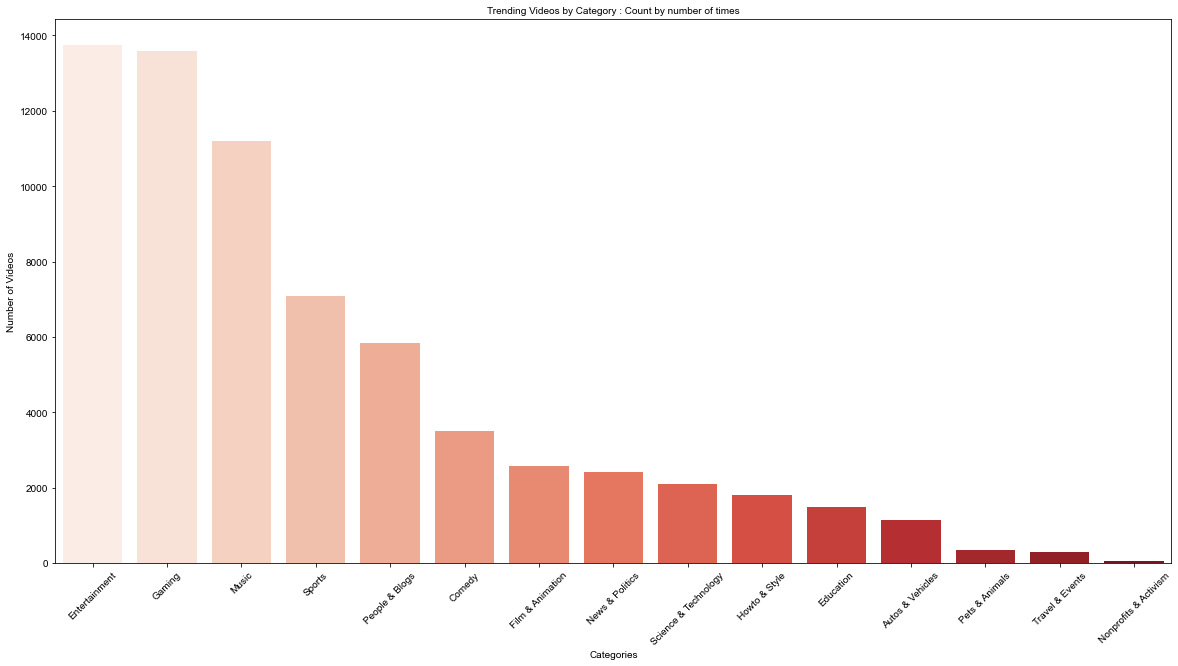

In [15]:
categories = df['categoryId'].value_counts()
df_categories = categories.rename_axis('category').reset_index(name='counts_by_times')
display(df_categories)
# Bar graph for number of videos per category
plt.figure(figsize=(20,10))
x=categories.index
y=categories.values
sns.barplot(x, y, palette="Reds")
sns.set_style('white')
sns.set(font_scale=1)
plt.xticks(rotation=45)
plt.xlabel('Categories', fontsize=10)
plt.ylabel('Number of Videos', fontsize=10)
plt.title('Trending Videos by Category : Count by number of times', fontsize=10)
plt.show()

In [16]:
df_categories['Percentage(counts_by_times)'] = ((df_categories['counts_by_times']/df_categories['counts_by_times'].sum()))
df_categories

,category,counts_by_times,Percentage(counts_by_times)
0,Entertainment,13740,0.204479
1,Gaming,13585,0.202173
2,Music,11198,0.166649
3,Sports,7091,0.105529
4,People & Blogs,5836,0.086852
5,Comedy,3506,0.052177
6,Film & Animation,2585,0.038470
7,News & Politics,2418,0.035985
8,Science & Technology,2096,0.031193
9,Howto & Style,1812,0.026966


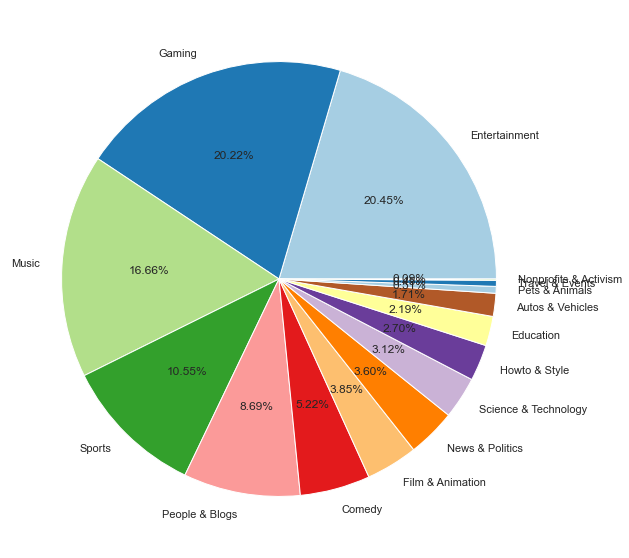

In [17]:
plt.figure(figsize=(20,10))
colors = sns.color_palette('Paired')[0:14]
data = df_categories['Percentage(counts_by_times)']
labels = df_categories['category']
#create pie chart
plt.pie(data, labels = labels , colors = colors,autopct='%.2f%%')
plt.show()

,category,counts_by_videos
0,Gaming,2369
1,Entertainment,2340
2,Music,1849
3,Sports,1342
4,People & Blogs,1029
5,Comedy,588
6,News & Politics,450
7,Film & Animation,425
8,Science & Technology,362
9,Howto & Style,301


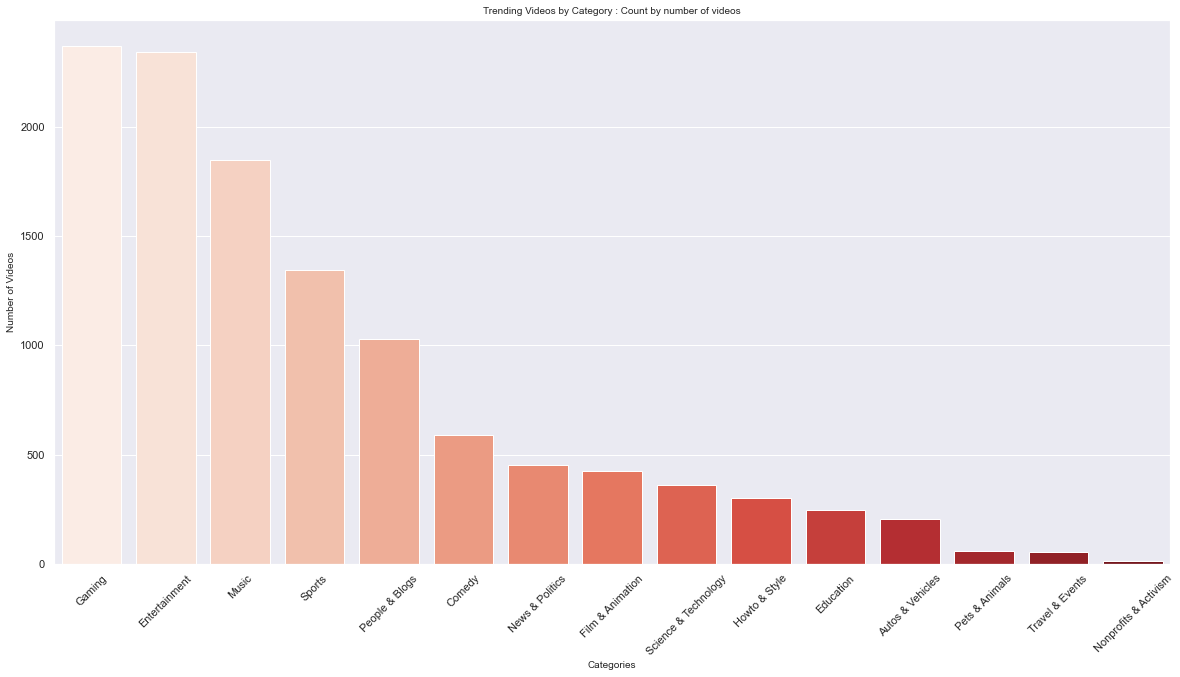

In [18]:
categories_u = df_unique['categoryId'].value_counts()
df_categories_u = categories_u.rename_axis('category').reset_index(name='counts_by_videos')
display(df_categories_u)
# Bar graph for number of videos per category
plt.figure(figsize=(20,10))
x=categories_u.index
y=categories_u.values
sns.barplot(x, y, palette="Reds")
sns.set_style('white')
sns.set(font_scale=1)
plt.xticks(rotation=45)
plt.xlabel('Categories', fontsize=10)
plt.ylabel('Number of Videos', fontsize=10)
plt.title('Trending Videos by Category : Count by number of videos', fontsize=10)
plt.show()

In [19]:
df_categories_u['Percentage(counts_by_videos)'] = ((df_categories_u['counts_by_videos']/df_categories_u['counts_by_videos'].sum()))
df_categories_u

,category,counts_by_videos,Percentage(counts_by_videos)
0,Gaming,2369,0.203680
1,Entertainment,2340,0.201186
2,Music,1849,0.158972
3,Sports,1342,0.115381
4,People & Blogs,1029,0.088470
5,Comedy,588,0.050555
6,News & Politics,450,0.038690
7,Film & Animation,425,0.036540
8,Science & Technology,362,0.031124
9,Howto & Style,301,0.025879


2. Trending Videos by Channel

,channel,counts_by_times
0,SSSniperWolf,392
1,NBA,392
2,SSundee,367
3,NFL,319
4,MrBeast Gaming,225
...,...,...
3725,Trump White House,1
3726,Bandai Namco Entertainment America,1
3727,Paradox Interactive,1
3728,Republic Records,1


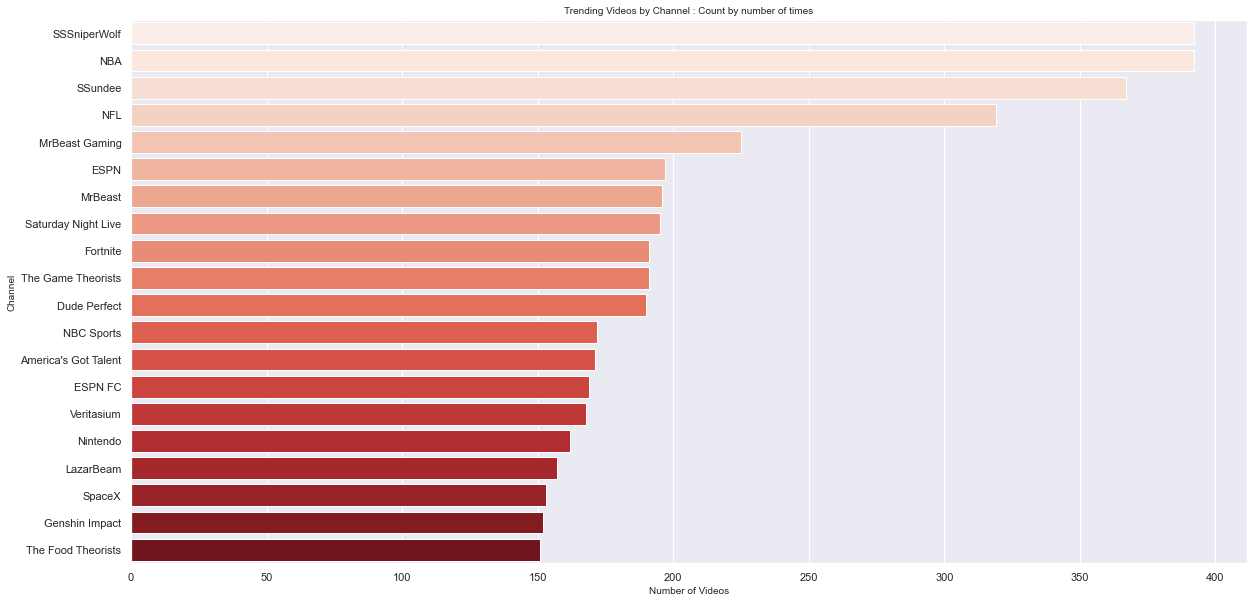

In [20]:
channel = df['channelTitle'].value_counts()
df_channel = channel.rename_axis('channel').reset_index(name='counts_by_times')
display(df_channel)
# Bar graph for number of videos per category
plt.figure(figsize=(20,10))
x=channel.values[0:20]
y=channel.index[0:20]
sns.barplot(x, y, palette="Reds")
sns.set_style('white')
sns.set(font_scale=1)
plt.xticks(rotation=0)
plt.ylabel('Channel', fontsize=10)
plt.xlabel('Number of Videos', fontsize=10)
plt.title('Trending Videos by Channel : Count by number of times', fontsize=10)
plt.show()

,channel,counts_by_videos
0,NBA,86
1,SSundee,77
2,SSSniperWolf,76
3,NFL,75
4,NBC Sports,47
...,...,...
3716,SteveDangle,1
3717,Doe Boy,1
3718,Tech Rander,1
3719,Hyram,1


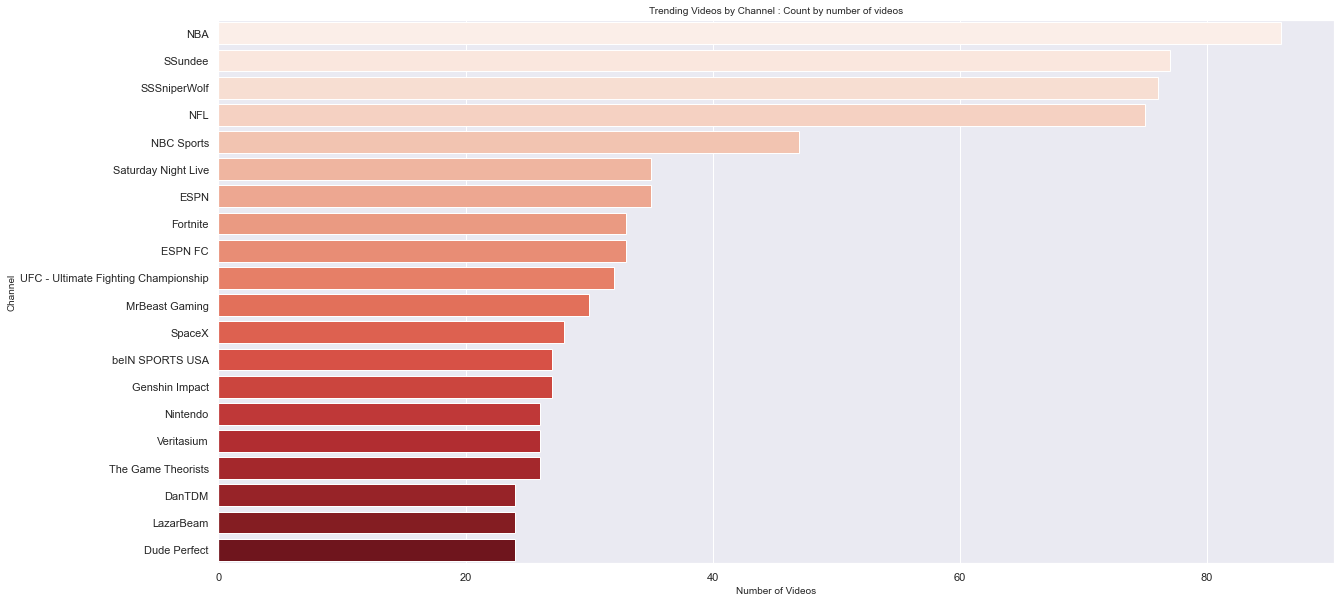

In [21]:
channel_u = df_unique['channelTitle'].value_counts()
df_channel_u = channel_u.rename_axis('channel').reset_index(name='counts_by_videos')
display(df_channel_u)
# Bar graph for number of videos per category
plt.figure(figsize=(20,10))
x=channel_u.values[0:20]
y=channel_u.index[0:20]
sns.barplot(x, y, palette="Reds")
sns.set_style('white')
sns.set(font_scale=1)
plt.xticks(rotation=0)
plt.ylabel('Channel', fontsize=10)
plt.xlabel('Number of Videos', fontsize=10)
plt.title('Trending Videos by Channel : Count by number of videos', fontsize=10)
plt.show()

3. Wordcloud

3.1 Top Title of trending videos

- Text preprocessing

In [22]:
import string
PUNCT_TO_REMOVE = string.punctuation
PUNCT_TO_REMOVE +="0123456789"  # add number
PUNCT_TO_REMOVE

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~0123456789'

In [23]:
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

In [24]:
def lowerText(text):
    text = text.str.lower()
    return text

In [25]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
STOPWORDS = set(stopwords.words('english'))
print(STOPWORDS)

{'during', "don't", 'such', 'how', 'who', 'him', 'same', "couldn't", 'ours', 'aren', 'some', "won't", 'against', 'were', 'being', 'to', 'then', 'more', "haven't", 'than', 'couldn', "mightn't", 'ourselves', 'having', 'do', 'where', 'they', 'yours', 'himself', "isn't", 'mustn', 'now', 'further', 'why', 'he', 'she', 'theirs', 'not', 'above', 'these', 'been', 'and', 'ma', 'm', 'does', 'needn', 'there', "hasn't", 'shan', 'this', 'am', 'will', 'which', 'if', 'an', 'didn', 'ain', 'wasn', 'all', 'too', 'both', 'those', 'few', 's', "you'll", 'it', "it's", 'into', 'here', 'through', "shan't", 'own', 'myself', 'the', "didn't", 't', "shouldn't", 're', 'nor', 'o', 'haven', 'me', 'as', 'after', "mustn't", 'but', 'at', "you'd", "you're", "weren't", 'we', 'his', 'isn', 'whom', "you've", 'herself', 'from', 'a', 'yourselves', 'until', "she's", 'was', 'doing', 'any', 've', 'doesn', 'is', 'each', "doesn't", 'about', 'while', 'your', 'you', 'between', 'most', 'so', 'are', 'below', 'y', 'under', 'll', 'only

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tapak\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [26]:
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

In [27]:
df['title']= df['title'].apply(lambda text: remove_punctuation(text))
df['title'] = lowerText(df['title'])
df['title'] = df['title'].apply(lambda text: remove_stopwords(text))

In [28]:
title_words = list(df["title"].apply(lambda x: x.split()))
title_words = [x for y in title_words for x in y]
Counter(title_words).most_common(10)

[('official', 8699),
 ('video', 7369),
 ('vs', 3733),
 ('minecraft', 3522),
 ('trailer', 2793),
 ('music', 2686),
 ('highlights', 2576),
 ('shorts', 2508),
 ('new', 2507),
 ('game', 2032)]

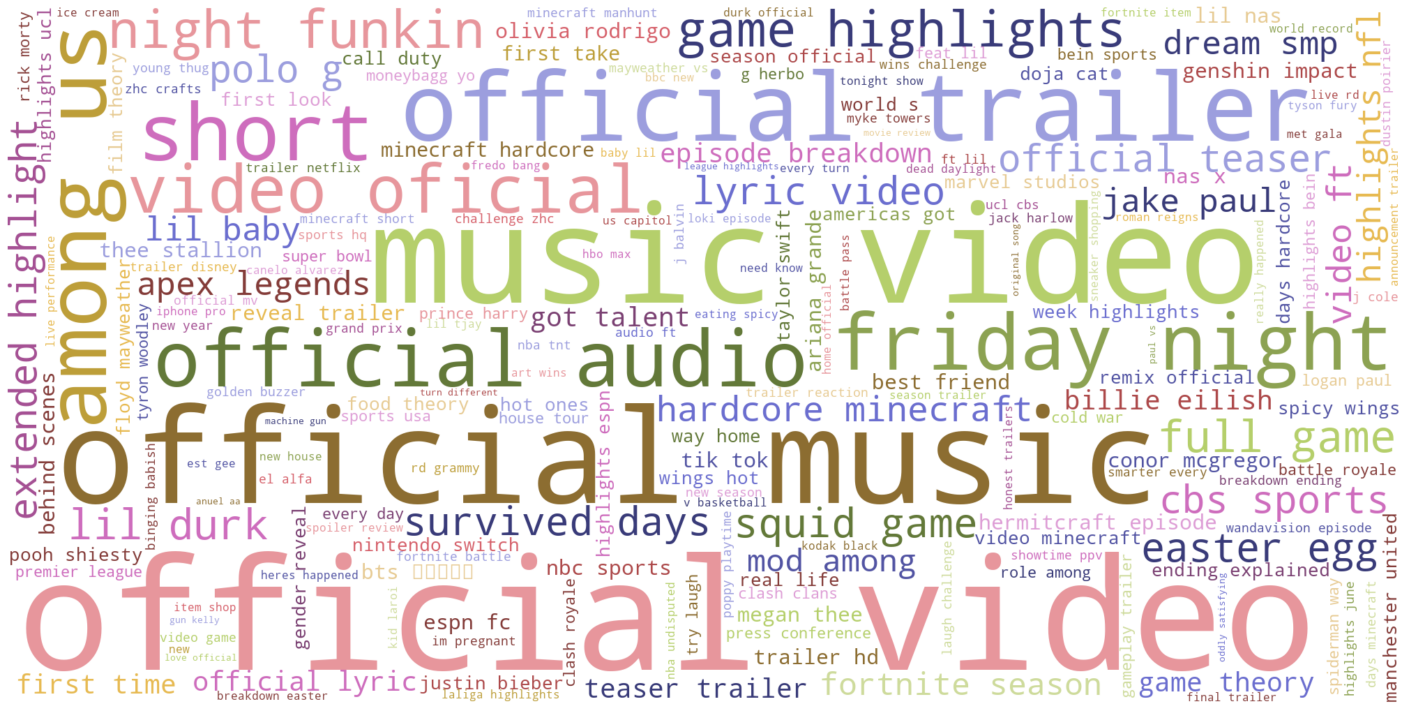

In [29]:
import wordcloud
wc = wordcloud.WordCloud(width=2000, height=1000, 
                         collocations=True, background_color="white", 
                         colormap="tab20b").generate(" ".join(title_words))
plt.figure(figsize=(25,15))
plt.imshow(wc, interpolation='bilinear')
_ = plt.axis("off")

3.2 Top tags of trending videos

In [30]:
tag_words = list(df["tags"].apply(lambda x: x.split(',')))
tag_words = [x for y in tag_words for x in y]
Counter(tag_words).most_common(10)

[('[none]', 10914),
 ('funny', 4937),
 ('minecraft', 4050),
 ('comedy', 3073),
 ('challenge', 2387),
 ('rap', 2100),
 ('vlog', 1758),
 ('hip hop', 1695),
 ('news', 1643),
 ('music', 1545)]

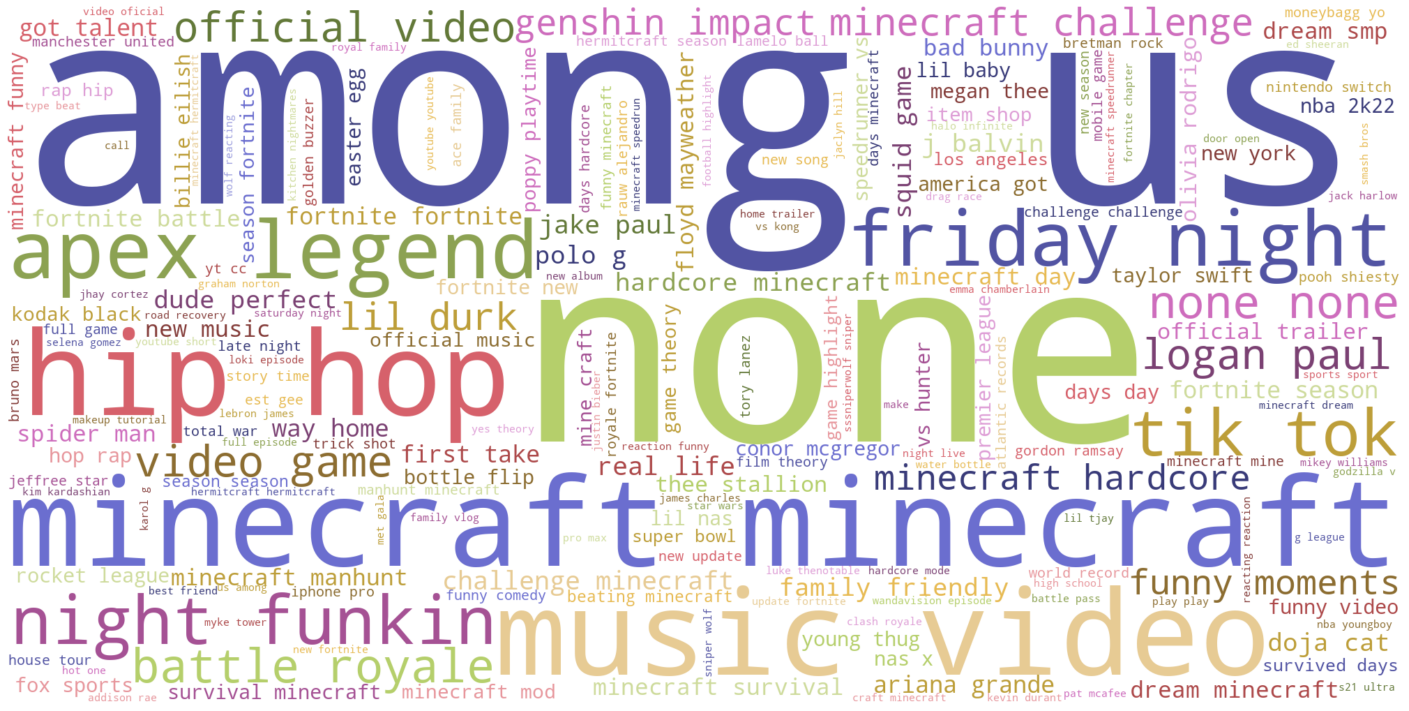

In [31]:
import wordcloud
wc = wordcloud.WordCloud(width=2000, height=1000, 
                         collocations=True, background_color="white", 
                         colormap="tab20b").generate(" ".join(tag_words))
plt.figure(figsize=(25,15))
plt.imshow(wc, interpolation='bilinear')
_ = plt.axis("off")

In [32]:
per_none="{:.2%}".format(len(df.loc[df['tags']=='[none]'])/len(df))
print('Percentage of Trending videos has not tags :',per_none)

Percentage of Trending videos has not tags : 16.24%


4. Top videos that are trending on the first day have the highest views.

In [33]:
df_unique.sort_values(by='view_count',ascending=False).head(3)

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,trending_date(year)
80193,awkkyBH2zEo,LISA - 'LALISA' M/V,2021-09-10T04:00:13Z,UCOmHUn--16B90oW2L6FRR3A,BLACKPINK,Music,2021-09-11T00:00:00Z,"yg entertainment,yg,와이지,k-pop,blackpink,블랙핑크,블...",85890366,5921316,38624,1958529,False,False,2021
55605,WMweEpGlu_U,BTS (방탄소년단) 'Butter' Official MV,2021-05-21T03:46:13Z,UC3IZKseVpdzPSBaWxBxundA,HYBE LABELS,Music,2021-05-21T00:00:00Z,"bighit,빅히트,방탄소년단,bts,bangtan,방탄",67111752,7110071,8998,3400291,False,False,2021
65398,Fw7fbKoK3e8,MvRyhan Funny videos #tiktok #Shorts,2021-06-25T07:37:36Z,UCcFQLco2CA2uq9J2Uwcoi6Q,Mv Ryhan,Entertainment,2021-06-29T00:00:00Z,[none],59410897,1176893,39704,4850,False,False,2021


5. Number of trending videos for each days

In [34]:
df["trending_date(month)"] = df['trending_date'].apply(lambda x: x[5:7])
df["trending_date(days)"] = df['trending_date'].apply(lambda x: x[8:10])

In [35]:
df['trending_date_cl'] = df['trending_date(year)'].map(str) + '-' + df['trending_date(month)'].map(str) + '-' + df['trending_date(days)'].map(str)
df

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,trending_date(year),trending_date(month),trending_date(days),trending_date_cl
27596,2IQ4Kr-SnU0,stunning conclusion amazing tribute show aew b...,2020-12-31T03:58:51Z,UCFN4JkGP_bVhAdBsoV9xftA,All Elite Wrestling,Entertainment,2021-01-01T00:00:00Z,"all elite wrestling,aew,the young bucks,cody r...",2032920,78122,1329,6034,False,False,2021,01,01,2021-01-01
27597,p19cjKg8dIc,goodbye california new chapter,2020-12-30T16:58:08Z,UCcgVECVN4OKV6DH1jLkqmcA,Jake Paul,People & Blogs,2021-01-01T00:00:00Z,jake paul,3760339,98307,40685,20026,False,False,2021,01,01,2021-01-01
27598,wW-KBzKWvrU,concerning wendigo doll apology,2020-12-31T09:16:45Z,UCitKV0ebZVbtU2nIPihDGMQ,Dollightful,Entertainment,2021-01-01T00:00:00Z,[none],1548097,0,0,0,True,True,2021,01,01,2021-01-01
27599,fn3KWM1kuAw,love,2020-12-29T18:51:48Z,UC7vVhkEfw4nOGp8TyDk7RcQ,Boston Dynamics,Science & Technology,2021-01-01T00:00:00Z,"boston dynamics,robots,dynamic balance,dancing...",16682361,635149,13725,90621,False,False,2021,01,01,2021-01-01
27600,nlGllxnSfgA,among us w corpse james addison bretman karl g...,2020-12-30T04:37:38Z,UCt_DaLB_NDqPVxezyvcfRtg,LARRAY,People & Blogs,2021-01-01T00:00:00Z,larray,2812174,112899,2655,5870,False,False,2021,01,01,2021-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94786,IrjbjSS1MHk,putting engine tesla taking get oil change,2021-11-15T17:00:25Z,UCR0VLWitB2xM4q7tjkoJUPw,Vlog Creations,Entertainment,2021-11-22T00:00:00Z,"rosscreations,ross,creations,funny,hilarious,s...",2312514,111085,1689,5122,False,False,2021,11,22,2021-11-22
94787,JLn58b_zErg,keke palmer explains went “instagram official”...,2021-11-15T23:17:48Z,UCcq6gCTW4ntQny2ACWXXLlw,Tamron Hall Show,Entertainment,2021-11-22T00:00:00Z,"tamron hall,tamron hall show,tamron,daytime te...",334966,9431,166,716,False,False,2021,11,22,2021-11-22
94788,X4isJPktybU,spiderman way home trailer reaction captain am...,2021-11-17T02:59:48Z,UC7yRILFFJ2QZCykymr8LPwA,New Rockstars,Entertainment,2021-11-22T00:00:00Z,"new rockstars,new rockstars youtube,youtube ne...",1455253,77807,1137,4669,False,False,2021,11,22,2021-11-22
94789,e_XC7xxBtx0,booted back changed meet salvaged brute,2021-11-16T10:04:13Z,UClG8odDC8TS6Zpqk9CGVQiQ,Fortnite,Gaming,2021-11-22T00:00:00Z,yt:cc=on,708336,34931,3190,5211,False,False,2021,11,22,2021-11-22


In [36]:
no=df['trending_date_cl'].value_counts()
df_no=pd.DataFrame({'trending_date':no.index,'number of videos':no.values})
df_no=df_no.sort_values(by='trending_date')
df_no

,trending_date,number of videos
167,2021-01-01,200
262,2021-01-02,200
221,2021-01-03,200
220,2021-01-04,200
219,2021-01-05,200
...,...,...
111,2021-11-18,200
110,2021-11-19,200
109,2021-11-20,200
108,2021-11-21,200


In [37]:
df_no.describe()

,number of videos
count,316.000000
mean,212.642405
std,48.778885
min,197.000000
25%,200.000000
50%,200.000000
75%,200.000000
max,400.000000


6. Number of trending videos for each month

In [38]:
df['trending_date_cl'] = df['trending_date(year)'].map(str) + '-' + df['trending_date(month)'].map(str)

In [39]:
no=df['trending_date_cl'].value_counts()
df_no=pd.DataFrame({'trending_date':no.index,'number of videos':no.values})
df_no=df_no.sort_values(by='trending_date')
df_no

,trending_date,number of videos
2,2021-01,6200
8,2021-02,5396
1,2021-03,6400
7,2021-04,5999
9,2021-05,5200
0,2021-06,9000
3,2021-07,6200
4,2021-08,6200
6,2021-09,6000
5,2021-10,6200


In [40]:
df_no.describe()

,number of videos
count,11.000000
mean,6108.636364
std,1129.380208
min,4400.000000
25%,5697.500000
50%,6200.000000
75%,6200.000000
max,9000.000000


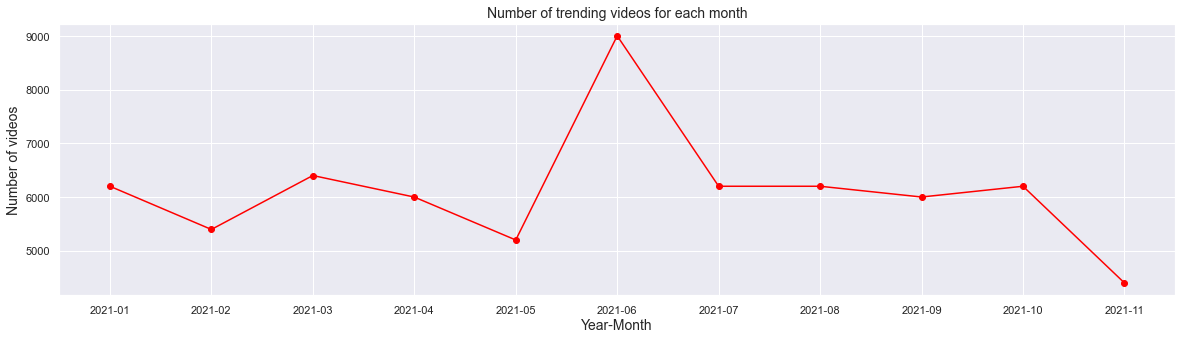

In [41]:
fig, ax = plt.subplots(figsize=(20,5))
plt.plot(df_no['trending_date'],df_no['number of videos'], color='red',marker='o')
plt.title('Number of trending videos for each month', fontsize=14)
plt.xlabel('Year-Month', fontsize=14)
plt.ylabel('Number of videos', fontsize=14)
plt.grid(True)
plt.show()

7. Number of new videos in trend for each days

In [42]:
df_unique["trending_date(month)"] = df_unique['trending_date'].apply(lambda x: x[5:7])
df_unique["trending_date(days)"] = df_unique['trending_date'].apply(lambda x: x[8:10])
df_unique

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,trending_date(year),trending_date(month),trending_date(days)
27596,2IQ4Kr-SnU0,The Stunning Conclusion to an Amazing Tribute ...,2020-12-31T03:58:51Z,UCFN4JkGP_bVhAdBsoV9xftA,All Elite Wrestling,Entertainment,2021-01-01T00:00:00Z,"all elite wrestling,aew,the young bucks,cody r...",2032920,78122,1329,6034,False,False,2021,01,01
27597,p19cjKg8dIc,goodbye california. a new chapter.,2020-12-30T16:58:08Z,UCcgVECVN4OKV6DH1jLkqmcA,Jake Paul,People & Blogs,2021-01-01T00:00:00Z,jake paul,3760339,98307,40685,20026,False,False,2021,01,01
27598,wW-KBzKWvrU,Concerning the Wendigo doll: An Apology,2020-12-31T09:16:45Z,UCitKV0ebZVbtU2nIPihDGMQ,Dollightful,Entertainment,2021-01-01T00:00:00Z,[none],1548097,0,0,0,True,True,2021,01,01
27599,fn3KWM1kuAw,Do You Love Me?,2020-12-29T18:51:48Z,UC7vVhkEfw4nOGp8TyDk7RcQ,Boston Dynamics,Science & Technology,2021-01-01T00:00:00Z,"boston dynamics,robots,dynamic balance,dancing...",16682361,635149,13725,90621,False,False,2021,01,01
27600,nlGllxnSfgA,"AMONG US W/ CORPSE, JAMES, ADDISON, BRETMAN, K...",2020-12-30T04:37:38Z,UCt_DaLB_NDqPVxezyvcfRtg,LARRAY,People & Blogs,2021-01-01T00:00:00Z,larray,2812174,112899,2655,5870,False,False,2021,01,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94638,E9FA3T2iXO4,My SISTER Guesses Friday Night Funkin' MOD Cha...,2021-11-20T09:15:24Z,UC5LtuaEU33VB44GVSN0H5Xg,Metatera,Gaming,2021-11-22T00:00:00Z,"fnf,friday night funkin,fnf mod,fnf mods,fnf b...",405692,9095,256,1581,False,False,2021,11,22
94640,6k5wnHLwqN8,Minecraft but YouTubers are TNT,2021-11-21T15:00:02Z,UCKGNVB2moP-zeAWPmw8HvAA,Craftee,Gaming,2021-11-22T00:00:00Z,"minecraft,minecraft but,new minecraft,craftee,...",1813083,51097,1506,3186,False,False,2021,11,22
94642,O5yyJXOyDcg,Playing Clash Royale Until I Get A Champion,2021-11-20T15:53:17Z,UCWdBWdJLbI7MEWgx36Nnhsw,KFC CLASH,Gaming,2021-11-22T00:00:00Z,"clash,royale,clashroyale,kfcclash,champion,cla...",397760,18378,235,353,False,False,2021,11,22
94645,4WrxddX6nBM,Shawn Porter Reflects on Loss to Terence Crawf...,2021-11-21T06:00:04Z,UCbzRzJNHx7ZLlJML9BjZQVQ,Top Rank Boxing,Sports,2021-11-22T00:00:00Z,"top rank boxing,terence crawford,terence crawf...",559854,5840,306,2622,False,False,2021,11,22


In [43]:
df_unique['trending_date_cl'] = df_unique['trending_date(year)'].map(str) + '-' + df_unique['trending_date(month)'].map(str) + '-' + df_unique['trending_date(days)'].map(str)
df_unique

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,trending_date(year),trending_date(month),trending_date(days),trending_date_cl
27596,2IQ4Kr-SnU0,The Stunning Conclusion to an Amazing Tribute ...,2020-12-31T03:58:51Z,UCFN4JkGP_bVhAdBsoV9xftA,All Elite Wrestling,Entertainment,2021-01-01T00:00:00Z,"all elite wrestling,aew,the young bucks,cody r...",2032920,78122,1329,6034,False,False,2021,01,01,2021-01-01
27597,p19cjKg8dIc,goodbye california. a new chapter.,2020-12-30T16:58:08Z,UCcgVECVN4OKV6DH1jLkqmcA,Jake Paul,People & Blogs,2021-01-01T00:00:00Z,jake paul,3760339,98307,40685,20026,False,False,2021,01,01,2021-01-01
27598,wW-KBzKWvrU,Concerning the Wendigo doll: An Apology,2020-12-31T09:16:45Z,UCitKV0ebZVbtU2nIPihDGMQ,Dollightful,Entertainment,2021-01-01T00:00:00Z,[none],1548097,0,0,0,True,True,2021,01,01,2021-01-01
27599,fn3KWM1kuAw,Do You Love Me?,2020-12-29T18:51:48Z,UC7vVhkEfw4nOGp8TyDk7RcQ,Boston Dynamics,Science & Technology,2021-01-01T00:00:00Z,"boston dynamics,robots,dynamic balance,dancing...",16682361,635149,13725,90621,False,False,2021,01,01,2021-01-01
27600,nlGllxnSfgA,"AMONG US W/ CORPSE, JAMES, ADDISON, BRETMAN, K...",2020-12-30T04:37:38Z,UCt_DaLB_NDqPVxezyvcfRtg,LARRAY,People & Blogs,2021-01-01T00:00:00Z,larray,2812174,112899,2655,5870,False,False,2021,01,01,2021-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94638,E9FA3T2iXO4,My SISTER Guesses Friday Night Funkin' MOD Cha...,2021-11-20T09:15:24Z,UC5LtuaEU33VB44GVSN0H5Xg,Metatera,Gaming,2021-11-22T00:00:00Z,"fnf,friday night funkin,fnf mod,fnf mods,fnf b...",405692,9095,256,1581,False,False,2021,11,22,2021-11-22
94640,6k5wnHLwqN8,Minecraft but YouTubers are TNT,2021-11-21T15:00:02Z,UCKGNVB2moP-zeAWPmw8HvAA,Craftee,Gaming,2021-11-22T00:00:00Z,"minecraft,minecraft but,new minecraft,craftee,...",1813083,51097,1506,3186,False,False,2021,11,22,2021-11-22
94642,O5yyJXOyDcg,Playing Clash Royale Until I Get A Champion,2021-11-20T15:53:17Z,UCWdBWdJLbI7MEWgx36Nnhsw,KFC CLASH,Gaming,2021-11-22T00:00:00Z,"clash,royale,clashroyale,kfcclash,champion,cla...",397760,18378,235,353,False,False,2021,11,22,2021-11-22
94645,4WrxddX6nBM,Shawn Porter Reflects on Loss to Terence Crawf...,2021-11-21T06:00:04Z,UCbzRzJNHx7ZLlJML9BjZQVQ,Top Rank Boxing,Sports,2021-11-22T00:00:00Z,"top rank boxing,terence crawford,terence crawf...",559854,5840,306,2622,False,False,2021,11,22,2021-11-22


In [44]:
no_u=df_unique['trending_date_cl'].value_counts()
df_no_unique=pd.DataFrame({'trending_date':no_u.index,'number of videos':no_u.values})
df_no_unique=df_no_unique.sort_values(by='trending_date')
df_no_unique=df_no_unique.iloc[1:,:]
df_no_unique

,trending_date,number of videos
287,2021-01-02,23
263,2021-01-03,26
300,2021-01-04,19
149,2021-01-05,36
235,2021-01-06,30
...,...,...
208,2021-11-18,32
189,2021-11-19,33
74,2021-11-20,42
151,2021-11-21,36


In [45]:
df_no_unique.describe()

,number of videos
count,315.000000
mean,36.288889
std,13.465302
min,8.000000
25%,30.000000
50%,35.000000
75%,42.000000
max,186.000000


8. Number of new videos in trend for each months

In [46]:
df_unique['trending_date_cl'] = df_unique['trending_date(year)'].map(str) + '-' + df_unique['trending_date(month)'].map(str)
df_unique

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,trending_date(year),trending_date(month),trending_date(days),trending_date_cl
27596,2IQ4Kr-SnU0,The Stunning Conclusion to an Amazing Tribute ...,2020-12-31T03:58:51Z,UCFN4JkGP_bVhAdBsoV9xftA,All Elite Wrestling,Entertainment,2021-01-01T00:00:00Z,"all elite wrestling,aew,the young bucks,cody r...",2032920,78122,1329,6034,False,False,2021,01,01,2021-01
27597,p19cjKg8dIc,goodbye california. a new chapter.,2020-12-30T16:58:08Z,UCcgVECVN4OKV6DH1jLkqmcA,Jake Paul,People & Blogs,2021-01-01T00:00:00Z,jake paul,3760339,98307,40685,20026,False,False,2021,01,01,2021-01
27598,wW-KBzKWvrU,Concerning the Wendigo doll: An Apology,2020-12-31T09:16:45Z,UCitKV0ebZVbtU2nIPihDGMQ,Dollightful,Entertainment,2021-01-01T00:00:00Z,[none],1548097,0,0,0,True,True,2021,01,01,2021-01
27599,fn3KWM1kuAw,Do You Love Me?,2020-12-29T18:51:48Z,UC7vVhkEfw4nOGp8TyDk7RcQ,Boston Dynamics,Science & Technology,2021-01-01T00:00:00Z,"boston dynamics,robots,dynamic balance,dancing...",16682361,635149,13725,90621,False,False,2021,01,01,2021-01
27600,nlGllxnSfgA,"AMONG US W/ CORPSE, JAMES, ADDISON, BRETMAN, K...",2020-12-30T04:37:38Z,UCt_DaLB_NDqPVxezyvcfRtg,LARRAY,People & Blogs,2021-01-01T00:00:00Z,larray,2812174,112899,2655,5870,False,False,2021,01,01,2021-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94638,E9FA3T2iXO4,My SISTER Guesses Friday Night Funkin' MOD Cha...,2021-11-20T09:15:24Z,UC5LtuaEU33VB44GVSN0H5Xg,Metatera,Gaming,2021-11-22T00:00:00Z,"fnf,friday night funkin,fnf mod,fnf mods,fnf b...",405692,9095,256,1581,False,False,2021,11,22,2021-11
94640,6k5wnHLwqN8,Minecraft but YouTubers are TNT,2021-11-21T15:00:02Z,UCKGNVB2moP-zeAWPmw8HvAA,Craftee,Gaming,2021-11-22T00:00:00Z,"minecraft,minecraft but,new minecraft,craftee,...",1813083,51097,1506,3186,False,False,2021,11,22,2021-11
94642,O5yyJXOyDcg,Playing Clash Royale Until I Get A Champion,2021-11-20T15:53:17Z,UCWdBWdJLbI7MEWgx36Nnhsw,KFC CLASH,Gaming,2021-11-22T00:00:00Z,"clash,royale,clashroyale,kfcclash,champion,cla...",397760,18378,235,353,False,False,2021,11,22,2021-11
94645,4WrxddX6nBM,Shawn Porter Reflects on Loss to Terence Crawf...,2021-11-21T06:00:04Z,UCbzRzJNHx7ZLlJML9BjZQVQ,Top Rank Boxing,Sports,2021-11-22T00:00:00Z,"top rank boxing,terence crawford,terence crawf...",559854,5840,306,2622,False,False,2021,11,22,2021-11


In [47]:
no_u=df_unique['trending_date_cl'].value_counts()
df_no_unique=pd.DataFrame({'trending_date':no_u.index,'number of videos':no_u.values})
df_no_unique=df_no_unique.sort_values(by='trending_date')
df_no_unique

,trending_date,number of videos
5,2021-01,1055
10,2021-02,839
6,2021-03,1011
8,2021-04,953
7,2021-05,974
4,2021-06,1108
3,2021-07,1128
2,2021-08,1131
1,2021-09,1232
0,2021-10,1284


In [48]:
df_no_unique.describe()

,number of videos
count,11.000000
mean,1057.363636
std,135.092763
min,839.000000
25%,963.500000
50%,1055.000000
75%,1129.500000
max,1284.000000


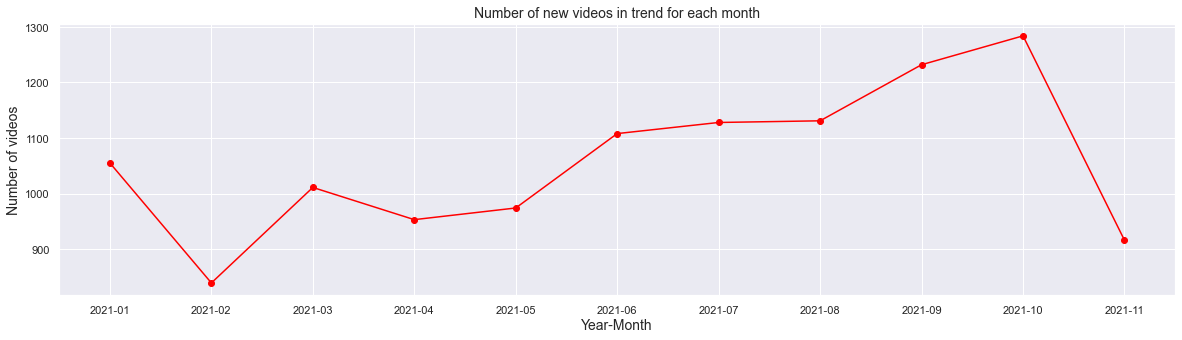

In [49]:
fig, ax = plt.subplots(figsize=(20,5))
plt.plot(df_no_unique['trending_date'],df_no_unique['number of videos'], color='red',marker='o')
plt.title('Number of new videos in trend for each month', fontsize=14)
plt.xlabel('Year-Month', fontsize=14)
plt.ylabel('Number of videos', fontsize=14)
plt.grid(True)
plt.show()

9. The best hours for upload videos.

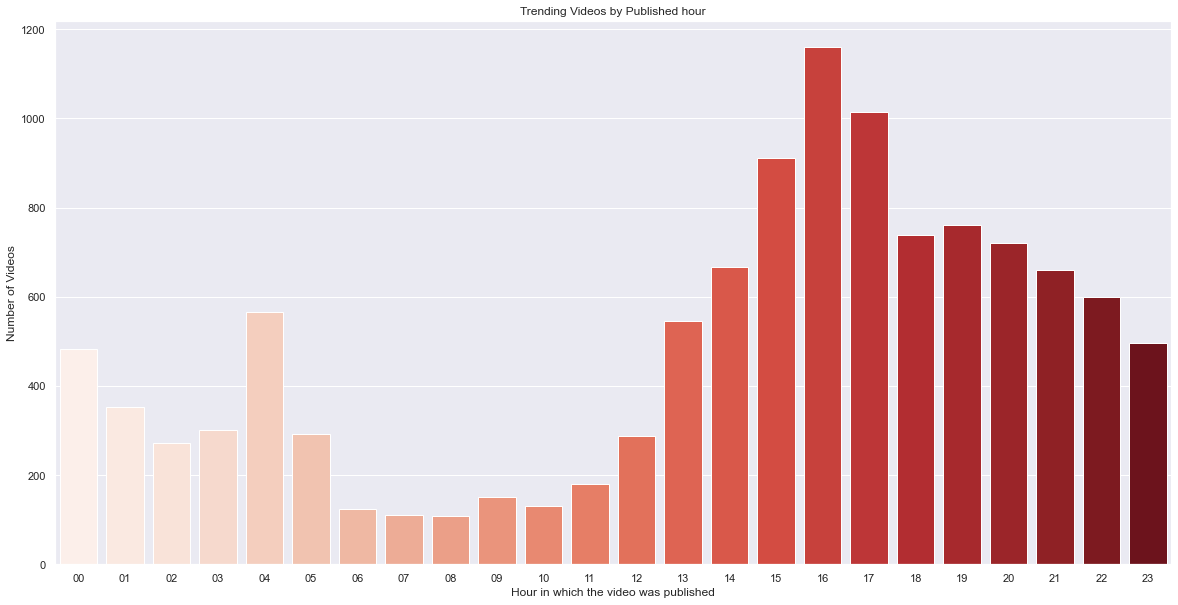

In [50]:
df_unique["publish_hour"] = df_unique["publishedAt"].apply(lambda x: x[11:13])

videos_by_pub_hour = df_unique.groupby("publish_hour").size().reset_index(name="no_of_videos")
    
fig, ax = plt.subplots(figsize=(20,10))
vph_plot = sns.barplot(x="publish_hour", y="no_of_videos", data=videos_by_pub_hour,palette="Reds")
vph_plot = ax.set(xlabel="Hour in which the video was published", ylabel="Number of Videos")
plt.title("Trending Videos by Published hour")
plt.show()

10. Correlation between some columns of US YouTube trending video analysis

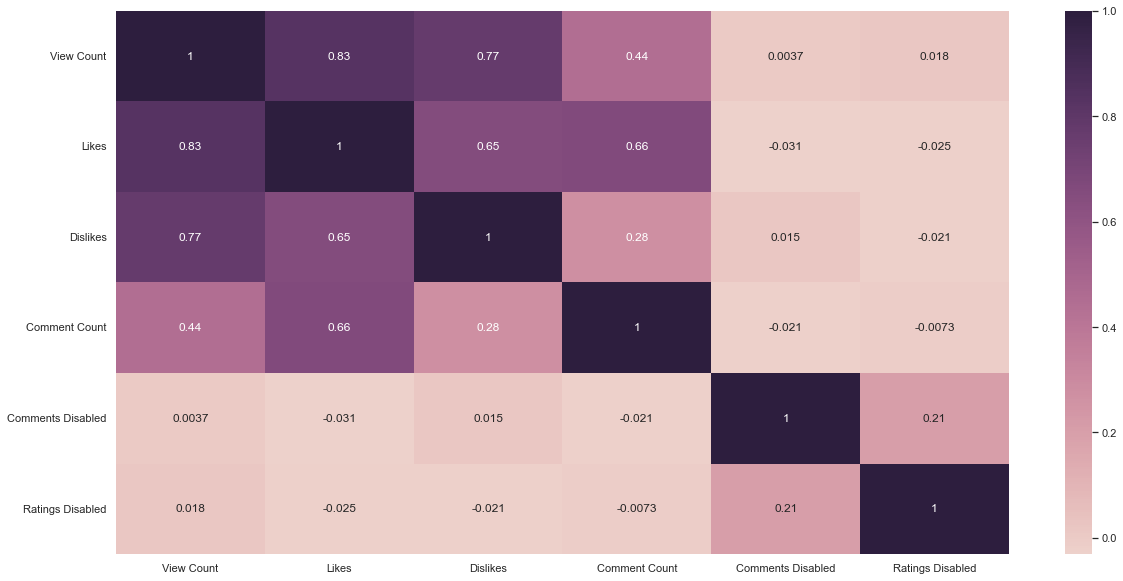

In [51]:
h_labels = [x.replace('_', ' ').title() for x in 
            list(df.select_dtypes(include=['number', 'bool']).columns.values)]

fig, ax = plt.subplots(figsize=(20,10))
_ = sns.heatmap(df.corr(), annot=True, xticklabels=h_labels, yticklabels=h_labels, cmap=sns.cubehelix_palette(as_cmap=True), ax=ax)

11. How long the videos is in trend?

In [52]:
trend_vd = df[['video_id']].\
    assign(trended_count= 1).\
    groupby(['video_id'],as_index=False).\
    count().\
    sort_values('trended_count',ascending=False).sort_values('trended_count')

In [53]:
trend_vd

,video_id,trended_count
10938,wCivJuVSF9s,1
5856,V1ChKoHwH3U,1
5835,UuZlU2BzpV4,1
6180,WzYnU_yTmAU,1
6993,aFlnrR9y0QI,1
...,...,...
10873,vrRfBmMWpLY,33
9190,mcUpeaSX8BE,34
10991,wY6UyatwVTA,34
7023,aONT7atzqfw,35


In [54]:
trend_vd=trend_vd['trended_count'].value_counts()
trend_vd=pd.DataFrame({'number of days':trend_vd.index,'number of videos':trend_vd.values})
trend_vd=trend_vd.sort_values(by='number of days').reset_index()
trend_vd

,index,number of days,number of videos
0,8,1,212
1,7,2,259
2,5,3,606
3,3,4,1648
4,1,5,2733
5,0,6,2755
6,2,7,1772
7,4,8,837
8,6,9,321
9,9,10,180


In [55]:
trend_vd.describe()

,index,number of days,number of videos
count,28.000000,28.000000,28.000000
mean,13.500000,15.821429,415.392857
std,8.225975,10.367519,803.342708
min,0.000000,1.000000,1.000000
25%,6.750000,7.750000,1.750000
50%,13.500000,14.500000,23.000000
75%,20.250000,21.500000,274.500000
max,27.000000,36.000000,2755.000000


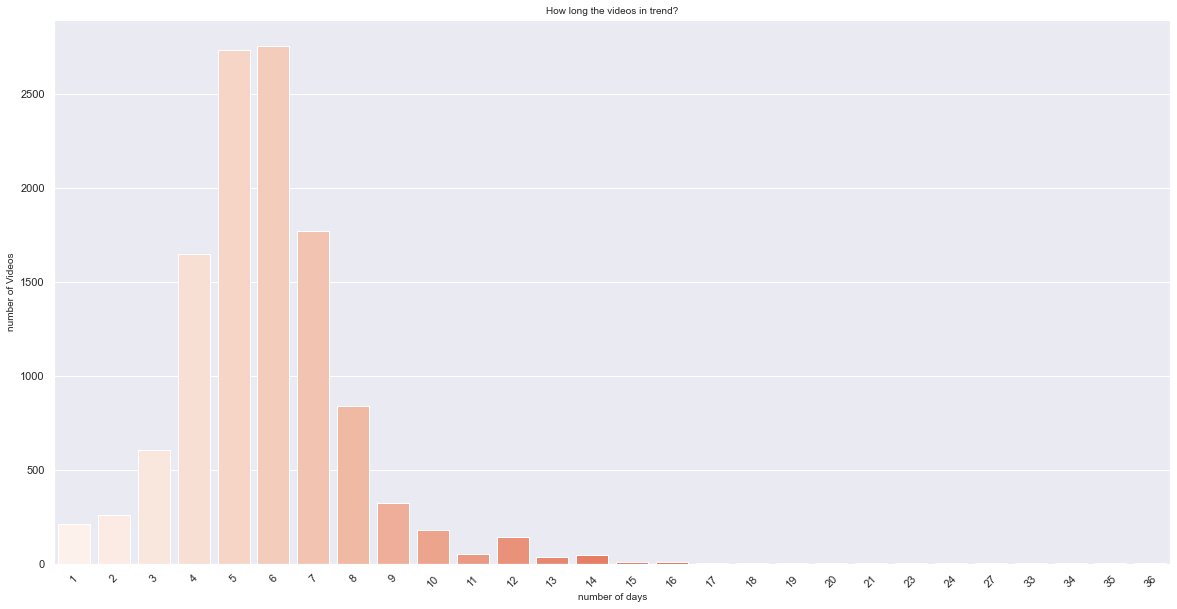

In [56]:
plt.figure(figsize=(20,10))
x=trend_vd['number of days']
y=trend_vd['number of videos']
sns.barplot(x, y, palette="Reds")
sns.set_style('white')
sns.set(font_scale=1)
plt.xticks(rotation=45)
plt.xlabel('number of days', fontsize=10)
plt.ylabel('number of Videos', fontsize=10)
plt.title('How long the videos in trend?', fontsize=10)
plt.show()

12. Top 3 Longest trending videos

In [57]:
df_freq=df['video_id'].value_counts()
df_freq

hdmx71UjBXs    36
aONT7atzqfw    35
wY6UyatwVTA    34
mcUpeaSX8BE    34
vrRfBmMWpLY    33
               ..
Xn51ge877q8     1
Kf6VLhtKLKc     1
8_tMRvpzDVc     1
UHaZjVe0HiA     1
SZrVwl3RmeA     1
Name: video_id, Length: 11631, dtype: int64

In [58]:
df_freq=pd.DataFrame({'video_id':df_freq.index,'number of days':df_freq.values})
df_freq

,video_id,number of days
0,hdmx71UjBXs,36
1,aONT7atzqfw,35
2,wY6UyatwVTA,34
3,mcUpeaSX8BE,34
4,vrRfBmMWpLY,33
...,...,...
11626,Xn51ge877q8,1
11627,Kf6VLhtKLKc,1
11628,8_tMRvpzDVc,1
11629,UHaZjVe0HiA,1


In [59]:
for i in range(3):
    url=df_freq.iloc[i,0]
    df_top3long=df.loc[df['video_id']==url]
    display(df_top3long.head(1))

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,trending_date(year),trending_date(month),trending_date(days),trending_date_cl
66405,hdmx71UjBXs,turn orbeez tutorial shorts,2021-07-03T04:04:57Z,UCt8z2S30Wl-GQEluFVM8NUw,Fortnite Fun TV,Entertainment,2021-07-04T00:00:00Z,[none],4473783,190996,11442,120,False,False,2021,07,04,2021-07


,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,trending_date(year),trending_date(month),trending_date(days),trending_date_cl
59591,aONT7atzqfw,floyd mayweather vs logan paul fight goes dist...,2021-06-07T05:40:56Z,UCja8sZ2T4ylIqjggA1Zuukg,CBS Sports HQ,Sports,2021-06-08T00:00:00Z,"cbs,cbs sports,sports,cbs sports hq,sports hq,...",10987189,112222,14073,20428,False,False,2021,06,08,2021-06


,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,trending_date(year),trending_date(month),trending_date(days),trending_date_cl
31201,wY6UyatwVTA,india claim stunning series win end australias...,2021-01-19T08:21:09Z,UCkBY0aHJP9BwjZLDYxAQrKg,cricket.com.au,Sports,2021-01-19T00:00:00Z,"australia,india,day five,fourth test,gabba,hig...",13516854,492839,8512,35888,False,False,2021,01,19,2021-01


13. How long does it take to become trendy?

In [60]:
df_unique["publish_date(year)"] = df['publishedAt'].apply(lambda x: x[0:4])
df_unique["publish_date(month)"] = df_unique['publishedAt'].apply(lambda x: x[5:7])
df_unique["publish_date(days)"] = df_unique['publishedAt'].apply(lambda x: x[8:10])

In [61]:
df_unique['trending_date_cl'] = df_unique['trending_date(year)'].map(str) + '-' + df_unique['trending_date(month)'].map(str) + '-' + df_unique['trending_date(days)'].map(str)
df_unique['publish_date_cl'] = df_unique['publish_date(year)'].map(str) + '-' + df_unique['publish_date(month)'].map(str) + '-' + df_unique['publish_date(days)'].map(str)
df_unique

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,...,ratings_disabled,trending_date(year),trending_date(month),trending_date(days),trending_date_cl,publish_hour,publish_date(year),publish_date(month),publish_date(days),publish_date_cl
27596,2IQ4Kr-SnU0,The Stunning Conclusion to an Amazing Tribute ...,2020-12-31T03:58:51Z,UCFN4JkGP_bVhAdBsoV9xftA,All Elite Wrestling,Entertainment,2021-01-01T00:00:00Z,"all elite wrestling,aew,the young bucks,cody r...",2032920,78122,...,False,2021,01,01,2021-01-01,03,2020,12,31,2020-12-31
27597,p19cjKg8dIc,goodbye california. a new chapter.,2020-12-30T16:58:08Z,UCcgVECVN4OKV6DH1jLkqmcA,Jake Paul,People & Blogs,2021-01-01T00:00:00Z,jake paul,3760339,98307,...,False,2021,01,01,2021-01-01,16,2020,12,30,2020-12-30
27598,wW-KBzKWvrU,Concerning the Wendigo doll: An Apology,2020-12-31T09:16:45Z,UCitKV0ebZVbtU2nIPihDGMQ,Dollightful,Entertainment,2021-01-01T00:00:00Z,[none],1548097,0,...,True,2021,01,01,2021-01-01,09,2020,12,31,2020-12-31
27599,fn3KWM1kuAw,Do You Love Me?,2020-12-29T18:51:48Z,UC7vVhkEfw4nOGp8TyDk7RcQ,Boston Dynamics,Science & Technology,2021-01-01T00:00:00Z,"boston dynamics,robots,dynamic balance,dancing...",16682361,635149,...,False,2021,01,01,2021-01-01,18,2020,12,29,2020-12-29
27600,nlGllxnSfgA,"AMONG US W/ CORPSE, JAMES, ADDISON, BRETMAN, K...",2020-12-30T04:37:38Z,UCt_DaLB_NDqPVxezyvcfRtg,LARRAY,People & Blogs,2021-01-01T00:00:00Z,larray,2812174,112899,...,False,2021,01,01,2021-01-01,04,2020,12,30,2020-12-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94638,E9FA3T2iXO4,My SISTER Guesses Friday Night Funkin' MOD Cha...,2021-11-20T09:15:24Z,UC5LtuaEU33VB44GVSN0H5Xg,Metatera,Gaming,2021-11-22T00:00:00Z,"fnf,friday night funkin,fnf mod,fnf mods,fnf b...",405692,9095,...,False,2021,11,22,2021-11-22,09,2021,11,20,2021-11-20
94640,6k5wnHLwqN8,Minecraft but YouTubers are TNT,2021-11-21T15:00:02Z,UCKGNVB2moP-zeAWPmw8HvAA,Craftee,Gaming,2021-11-22T00:00:00Z,"minecraft,minecraft but,new minecraft,craftee,...",1813083,51097,...,False,2021,11,22,2021-11-22,15,2021,11,21,2021-11-21
94642,O5yyJXOyDcg,Playing Clash Royale Until I Get A Champion,2021-11-20T15:53:17Z,UCWdBWdJLbI7MEWgx36Nnhsw,KFC CLASH,Gaming,2021-11-22T00:00:00Z,"clash,royale,clashroyale,kfcclash,champion,cla...",397760,18378,...,False,2021,11,22,2021-11-22,15,2021,11,20,2021-11-20
94645,4WrxddX6nBM,Shawn Porter Reflects on Loss to Terence Crawf...,2021-11-21T06:00:04Z,UCbzRzJNHx7ZLlJML9BjZQVQ,Top Rank Boxing,Sports,2021-11-22T00:00:00Z,"top rank boxing,terence crawford,terence crawf...",559854,5840,...,False,2021,11,22,2021-11-22,06,2021,11,21,2021-11-21


In [62]:
from datetime import datetime
df_unique['trending_date_cl'] = pd.to_datetime(df_unique['trending_date_cl'])
df_unique['publish_date_cl'] = pd.to_datetime(df_unique['publish_date_cl'])
df_unique

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,...,ratings_disabled,trending_date(year),trending_date(month),trending_date(days),trending_date_cl,publish_hour,publish_date(year),publish_date(month),publish_date(days),publish_date_cl
27596,2IQ4Kr-SnU0,The Stunning Conclusion to an Amazing Tribute ...,2020-12-31T03:58:51Z,UCFN4JkGP_bVhAdBsoV9xftA,All Elite Wrestling,Entertainment,2021-01-01T00:00:00Z,"all elite wrestling,aew,the young bucks,cody r...",2032920,78122,...,False,2021,01,01,2021-01-01,03,2020,12,31,2020-12-31
27597,p19cjKg8dIc,goodbye california. a new chapter.,2020-12-30T16:58:08Z,UCcgVECVN4OKV6DH1jLkqmcA,Jake Paul,People & Blogs,2021-01-01T00:00:00Z,jake paul,3760339,98307,...,False,2021,01,01,2021-01-01,16,2020,12,30,2020-12-30
27598,wW-KBzKWvrU,Concerning the Wendigo doll: An Apology,2020-12-31T09:16:45Z,UCitKV0ebZVbtU2nIPihDGMQ,Dollightful,Entertainment,2021-01-01T00:00:00Z,[none],1548097,0,...,True,2021,01,01,2021-01-01,09,2020,12,31,2020-12-31
27599,fn3KWM1kuAw,Do You Love Me?,2020-12-29T18:51:48Z,UC7vVhkEfw4nOGp8TyDk7RcQ,Boston Dynamics,Science & Technology,2021-01-01T00:00:00Z,"boston dynamics,robots,dynamic balance,dancing...",16682361,635149,...,False,2021,01,01,2021-01-01,18,2020,12,29,2020-12-29
27600,nlGllxnSfgA,"AMONG US W/ CORPSE, JAMES, ADDISON, BRETMAN, K...",2020-12-30T04:37:38Z,UCt_DaLB_NDqPVxezyvcfRtg,LARRAY,People & Blogs,2021-01-01T00:00:00Z,larray,2812174,112899,...,False,2021,01,01,2021-01-01,04,2020,12,30,2020-12-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94638,E9FA3T2iXO4,My SISTER Guesses Friday Night Funkin' MOD Cha...,2021-11-20T09:15:24Z,UC5LtuaEU33VB44GVSN0H5Xg,Metatera,Gaming,2021-11-22T00:00:00Z,"fnf,friday night funkin,fnf mod,fnf mods,fnf b...",405692,9095,...,False,2021,11,22,2021-11-22,09,2021,11,20,2021-11-20
94640,6k5wnHLwqN8,Minecraft but YouTubers are TNT,2021-11-21T15:00:02Z,UCKGNVB2moP-zeAWPmw8HvAA,Craftee,Gaming,2021-11-22T00:00:00Z,"minecraft,minecraft but,new minecraft,craftee,...",1813083,51097,...,False,2021,11,22,2021-11-22,15,2021,11,21,2021-11-21
94642,O5yyJXOyDcg,Playing Clash Royale Until I Get A Champion,2021-11-20T15:53:17Z,UCWdBWdJLbI7MEWgx36Nnhsw,KFC CLASH,Gaming,2021-11-22T00:00:00Z,"clash,royale,clashroyale,kfcclash,champion,cla...",397760,18378,...,False,2021,11,22,2021-11-22,15,2021,11,20,2021-11-20
94645,4WrxddX6nBM,Shawn Porter Reflects on Loss to Terence Crawf...,2021-11-21T06:00:04Z,UCbzRzJNHx7ZLlJML9BjZQVQ,Top Rank Boxing,Sports,2021-11-22T00:00:00Z,"top rank boxing,terence crawford,terence crawf...",559854,5840,...,False,2021,11,22,2021-11-22,06,2021,11,21,2021-11-21


In [63]:
df_unique['use']=df_unique['trending_date_cl']-df_unique['publish_date_cl']
df_unique

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,...,trending_date(year),trending_date(month),trending_date(days),trending_date_cl,publish_hour,publish_date(year),publish_date(month),publish_date(days),publish_date_cl,use
27596,2IQ4Kr-SnU0,The Stunning Conclusion to an Amazing Tribute ...,2020-12-31T03:58:51Z,UCFN4JkGP_bVhAdBsoV9xftA,All Elite Wrestling,Entertainment,2021-01-01T00:00:00Z,"all elite wrestling,aew,the young bucks,cody r...",2032920,78122,...,2021,01,01,2021-01-01,03,2020,12,31,2020-12-31,1 days
27597,p19cjKg8dIc,goodbye california. a new chapter.,2020-12-30T16:58:08Z,UCcgVECVN4OKV6DH1jLkqmcA,Jake Paul,People & Blogs,2021-01-01T00:00:00Z,jake paul,3760339,98307,...,2021,01,01,2021-01-01,16,2020,12,30,2020-12-30,2 days
27598,wW-KBzKWvrU,Concerning the Wendigo doll: An Apology,2020-12-31T09:16:45Z,UCitKV0ebZVbtU2nIPihDGMQ,Dollightful,Entertainment,2021-01-01T00:00:00Z,[none],1548097,0,...,2021,01,01,2021-01-01,09,2020,12,31,2020-12-31,1 days
27599,fn3KWM1kuAw,Do You Love Me?,2020-12-29T18:51:48Z,UC7vVhkEfw4nOGp8TyDk7RcQ,Boston Dynamics,Science & Technology,2021-01-01T00:00:00Z,"boston dynamics,robots,dynamic balance,dancing...",16682361,635149,...,2021,01,01,2021-01-01,18,2020,12,29,2020-12-29,3 days
27600,nlGllxnSfgA,"AMONG US W/ CORPSE, JAMES, ADDISON, BRETMAN, K...",2020-12-30T04:37:38Z,UCt_DaLB_NDqPVxezyvcfRtg,LARRAY,People & Blogs,2021-01-01T00:00:00Z,larray,2812174,112899,...,2021,01,01,2021-01-01,04,2020,12,30,2020-12-30,2 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94638,E9FA3T2iXO4,My SISTER Guesses Friday Night Funkin' MOD Cha...,2021-11-20T09:15:24Z,UC5LtuaEU33VB44GVSN0H5Xg,Metatera,Gaming,2021-11-22T00:00:00Z,"fnf,friday night funkin,fnf mod,fnf mods,fnf b...",405692,9095,...,2021,11,22,2021-11-22,09,2021,11,20,2021-11-20,2 days
94640,6k5wnHLwqN8,Minecraft but YouTubers are TNT,2021-11-21T15:00:02Z,UCKGNVB2moP-zeAWPmw8HvAA,Craftee,Gaming,2021-11-22T00:00:00Z,"minecraft,minecraft but,new minecraft,craftee,...",1813083,51097,...,2021,11,22,2021-11-22,15,2021,11,21,2021-11-21,1 days
94642,O5yyJXOyDcg,Playing Clash Royale Until I Get A Champion,2021-11-20T15:53:17Z,UCWdBWdJLbI7MEWgx36Nnhsw,KFC CLASH,Gaming,2021-11-22T00:00:00Z,"clash,royale,clashroyale,kfcclash,champion,cla...",397760,18378,...,2021,11,22,2021-11-22,15,2021,11,20,2021-11-20,2 days
94645,4WrxddX6nBM,Shawn Porter Reflects on Loss to Terence Crawf...,2021-11-21T06:00:04Z,UCbzRzJNHx7ZLlJML9BjZQVQ,Top Rank Boxing,Sports,2021-11-22T00:00:00Z,"top rank boxing,terence crawford,terence crawf...",559854,5840,...,2021,11,22,2021-11-22,06,2021,11,21,2021-11-21,1 days


In [64]:
df_unique['use']=df_unique['use'].dt.days
df_use=df_unique['use'].value_counts()
df_use=pd.DataFrame({'number of days that used':df_use.index,'number of videos':df_use.values})
df_use=df_use.sort_values(by='number of days that used').reset_index()
df_use

,index,number of days that used,number of videos
0,3,0,442
1,0,1,6590
2,1,2,3533
3,2,3,581
4,4,4,187
5,5,5,86
6,6,6,62
7,7,7,52
8,10,8,23
9,8,9,29


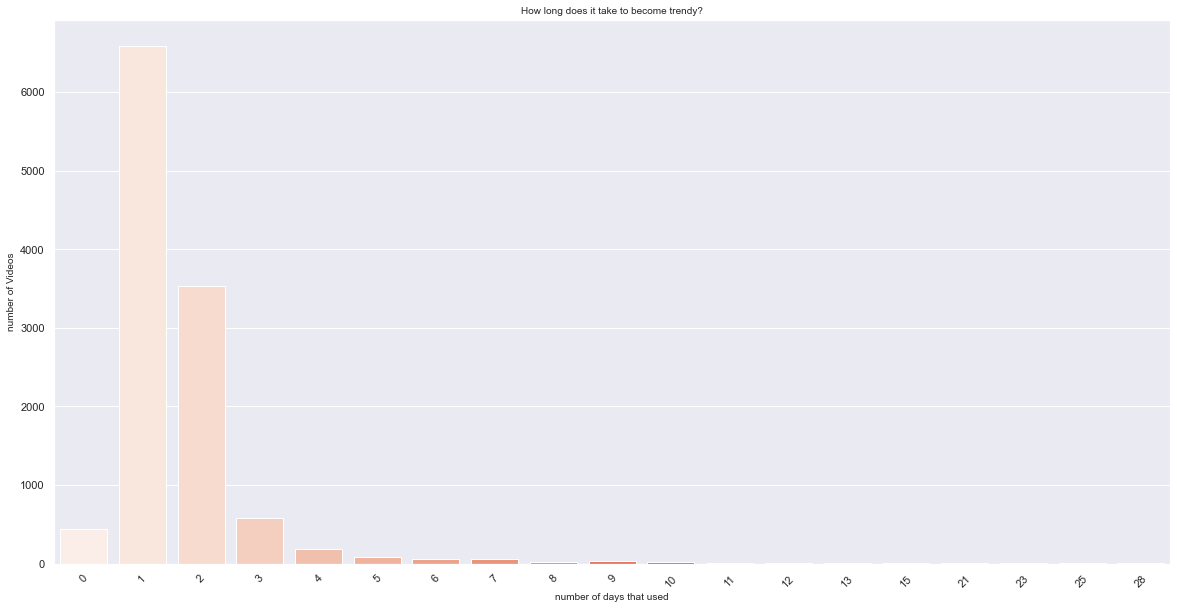

In [65]:
plt.figure(figsize=(20,10))
x=df_use['number of days that used']
y=df_use['number of videos']
sns.barplot(x, y, palette="Reds")
sns.set_style('white')
sns.set(font_scale=1)
plt.xticks(rotation=45)
plt.xlabel('number of days that used', fontsize=10)
plt.ylabel('number of Videos', fontsize=10)
plt.title('How long does it take to become trendy?', fontsize=10)
plt.show()

- Conclusion

Pros & Cons

    Pros
        - Get to know about the trends in the United States quickly. which is like a trend of the world
        - It is a guide for youtubers in the United States.
    Cons
        - Analyze only one country Can't fully interpret global trends.
        - Usually, YouTube trending update every 15 minutes. Therefore, the information may not be completely accurate.

Improve the project


- Add element analysis to clip cover (thumbnails) with image recognition.

- Add data analysis of other countries, including Thailand. for make interactive map. 